In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Import Rosbag Data

In [2]:
ls

brake_calibration.ipynb            sp_1,125.png  sp_2,9.png
log_brake_2020-08-13-11-52-40.bag  sp_2,25.png


In [3]:
bag = rosbag.Bag('log_brake_2020-08-13-11-52-40.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f', 'pkg_ta/LogBrakeCommand': '7f3b1ab4918c50642f07c6849a030a08'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/LogBrakeCommand', message_count=1316, connections=1, frequency=20.000686669082725), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=13103, connections=1, frequency=195.57055929872007)})

In [4]:
list_topic = []
list_msg = []
list_t = []
list_t_header = []
list_brake_sepoint = []
list_brake_position = []
list_brake_delta = []
list_brake_current = []
list_brake_R_current = []
list_brake_L_current = []
list_brake_pwm = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_brake_sepoint.append(msg.brake_setpoint)
    list_brake_position.append(msg.brake_position)
    list_brake_delta.append(msg.brake_delta)
    list_brake_current.append(msg.brake_current)
    list_brake_R_current.append(msg.brake_R_current)
    list_brake_L_current.append(msg.brake_L_current)
    list_brake_pwm.append(msg.brake_pwm)

brake_setpoint = np.array(list_brake_sepoint)
brake_position = np.array(list_brake_position)
brake_delta = np.array(list_brake_delta)
brake_R_current = np.array(list_brake_R_current)
brake_L_current = np.array(list_brake_L_current)
brake_pwm = np.array(list_brake_pwm)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header = np.array(list_t_header)
list_t_header -= list_t_header[0]

dt = list_t[1:] - list_t[:-1]
dt_header = list_t_header[1:] - list_t_header[:-1]

# CHECK TIMING

In [5]:
print('Sampling Rate yang digunakan di rospy adalah 200 Hz\n')
print('dt')
print('mean: {}'.format(np.mean(dt)))
print('std: {}'.format(np.std(dt)))
print('')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header)))
print('std: {}'.format(np.std(dt_header)))
print('')

Sampling Rate yang digunakan di rospy adalah 200 Hz

dt
mean: 0.005019458663898504
std: 0.00046739072482162257

dt_header
mean: 0.0050195059581960985
std: 0.00017065157676699095



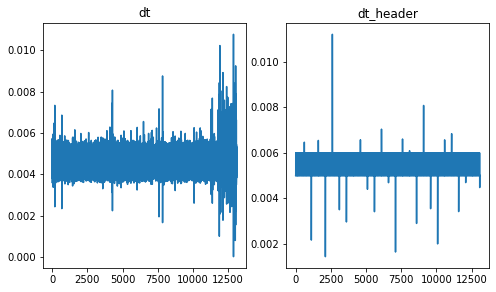

In [6]:
scale = 0.5
plt.figure(figsize=(16*scale, 9*scale))

plt.subplot(1,2,1)
plt.plot(dt)
plt.title("dt")

plt.subplot(1,2,2)
plt.plot(dt_header)
plt.title("dt_header")

plt.show()

# Analisis dan PLOT

In [7]:
print("Variasi Setpoint")
set(brake_setpoint)

Variasi Setpoint


{0.0,
 0.75,
 1.125,
 1.7999999523162842,
 2.25,
 2.4000000953674316,
 2.549999952316284,
 2.9000000953674316}

In [8]:
# Ambil yang {1.125, 2.25, 2.9}. Kalau semua bingung naro di laporannya
sp_1 = list(np.where(np.abs(brake_setpoint - 1.125) <= 0.01))[0]
sp_2 = list(np.where(np.abs(brake_setpoint - 2.25) <= 0.01))[0]
sp_3 = list(np.where(np.abs(brake_setpoint - 2.9) <= 0.01))[0]

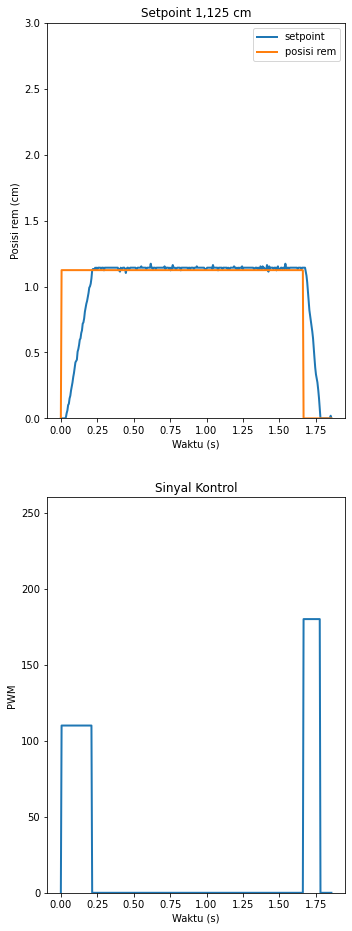

In [9]:
add_idx = [-1,40]

lim0 = sp_1[0]+add_idx[0]
lim1 = sp_1[-1]+add_idx[-1]

scale = 1.
plt.figure(figsize=(16/3*scale, 16*scale))

plt.subplot(2,1,1)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.)
plt.title('Setpoint 1,125 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.legend()
plt.ylim(0,3)

plt.subplot(2,1,2)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.)
plt.title('Sinyal Kontrol')
plt.xlabel('Waktu (s)')
plt.ylabel('PWM')
plt.ylim(0,260)

plt.savefig('sp_1,125.png', dpi=500, transparent=True)
plt.show()

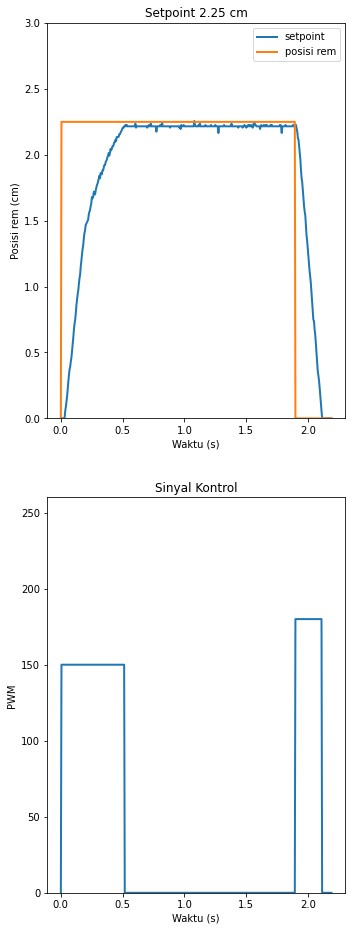

In [10]:
add_idx = [-1,60]

lim0 = sp_2[0]+add_idx[0]
lim1 = sp_2[-1]+add_idx[-1]

scale = 1.
plt.figure(figsize=(16/3*scale, 16*scale))

plt.subplot(2,1,1)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.)
plt.title('Setpoint 2.25 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.ylim(0,3)
plt.legend()

plt.subplot(2,1,2)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.)
plt.title('Sinyal Kontrol')
plt.ylim(0,260)
plt.xlabel('Waktu (s)')
plt.ylabel('PWM')

plt.savefig('sp_2,25.png', dpi=500, transparent=True)
plt.show()

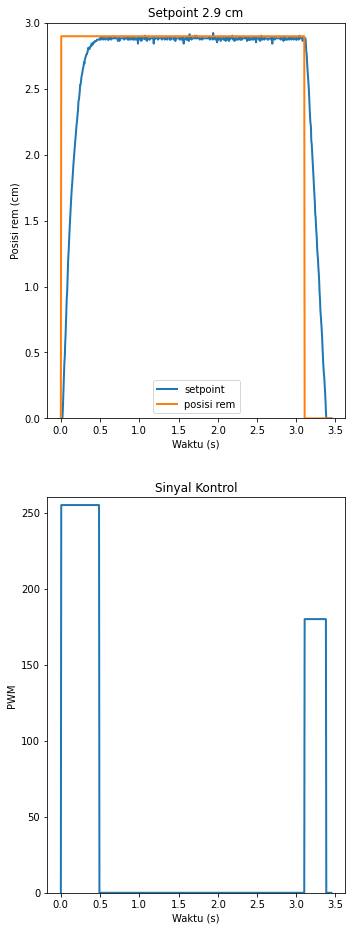

In [11]:
add_idx = [-1,70]

lim0 = sp_3[0]+add_idx[0]
lim1 = sp_3[-1]+add_idx[-1]

scale = 1.
plt.figure(figsize=(16/3*scale, 16*scale))

plt.subplot(2,1,1)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_position[lim0:lim1], label='setpoint', linewidth=2.)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_setpoint[lim0:lim1], label='posisi rem', linewidth=2.)
plt.title('Setpoint 2.9 cm')
plt.xlabel('Waktu (s)')
plt.ylabel('Posisi rem (cm)')
plt.ylim(0,3)
plt.legend()

plt.subplot(2,1,2)
plt.plot(list_t_header[lim0:lim1] - list_t_header[lim0], brake_pwm[lim0:lim1], linewidth=2.)
plt.title('Sinyal Kontrol')
plt.xlabel('Waktu (s)')
plt.ylim(0,260)
plt.ylabel('PWM')

plt.savefig('sp_2,9.png', dpi=500, transparent=True)
plt.show()